In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from datetime import datetime as dt
from joblib import dump, load

In [2]:
# Read the datasets from Bitcoin, Ethereum, and Cardano
btc = pd.read_csv('Data/coin_Bitcoin.csv')
eth = pd.read_csv('Data/coin_Ethereum.csv')
ada = pd.read_csv('Data/coin_Cardano.csv')

In [3]:
print(btc.info(),eth.info(),ada.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4

# Preprocessing and Prophet Modeling


In [4]:
def preprocess_and_model(crypto_df):
    # Preprocessing
    crypto_df = crypto_df.drop(['SNo','Name','Symbol','High','Low','Open','Marketcap','Volume'], axis=1)
    crypto_df['Date'] = crypto_df['Date'].apply(lambda date: dt.strptime(date,'%Y-%m-%d %H:%M:%S'))
    crypto_df = crypto_df.rename(columns={'Date':'ds','Close':'y'})
    train_percent = int(len(crypto_df)*0.80)
    test_periods = int(len(crypto_df)*0.20)
    crypto_train_df = crypto_df.iloc[:train_percent, :]
    
    # Modeling
    m = Prophet()
    m.fit(crypto_train_df)
    future = m.make_future_dataframe(periods=test_periods)
    forecast = m.predict(future)
    forecast_df = forecast[['ds','yhat','yhat_lower','yhat_upper']]
    predict_graph = m.plot(forecast)
    component_graph = m.plot_components(forecast)
    
    # Price prediction (yhat) vs acual price (y)
    price = crypto_df['y']
    acc_forecast = forecast[['ds','yhat']]
    crypto_accuracy_df = acc_forecast.join(price)
    crypto_accuracy_df = crypto_accuracy_df.set_index('ds')
    predict_accuracy_graph = crypto_accuracy_df.plot()
    
    return forecast_df, predict_graph, component_graph, predict_accuracy_graph
    

## Bitcoin

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2013-04-29 23:59:59,-504.348641,-1934.046761,1034.797642
1,2013-04-30 23:59:59,-478.938149,-2001.719875,976.232930
2,2013-05-01 23:59:59,-449.375694,-2009.468777,1011.333616
3,2013-05-02 23:59:59,-420.391525,-1875.178579,1073.144066
4,2013-05-03 23:59:59,-376.004314,-1860.049015,1102.699070
...,...,...,...,...
2985,2021-07-01 23:59:59,14988.196613,3076.214033,28636.844826
2986,2021-07-02 23:59:59,15013.597047,2995.453574,28362.662956
2987,2021-07-03 23:59:59,15041.038145,2910.814846,28846.830113
2988,2021-07-04 23:59:59,15045.841157,2781.364544,28763.767892


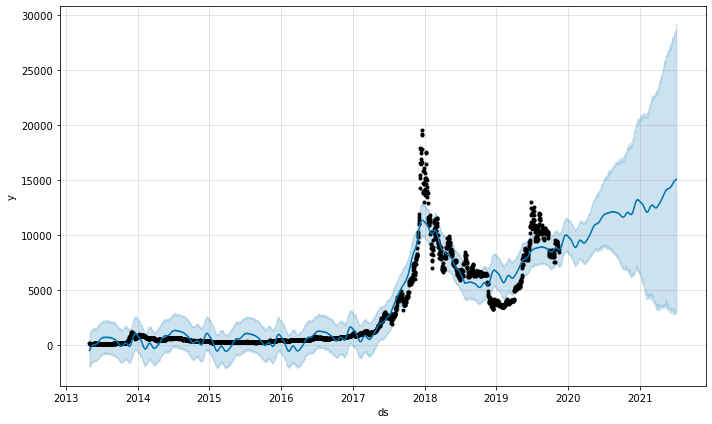

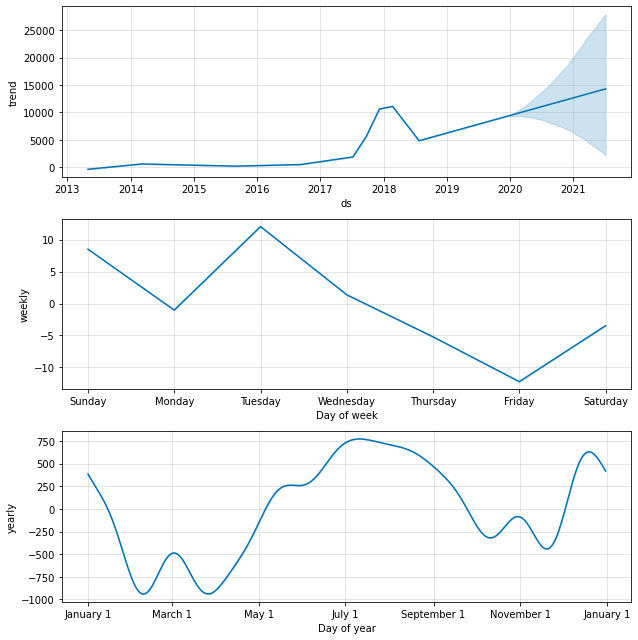

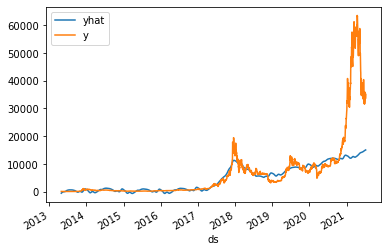

In [8]:
btc_forecast, btc_predictions, btc_components, btc_predict_accuracy = preprocess_and_model(btc)
btc_forecast

## Ethereum

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2015-08-08 23:59:59,32.405693,-46.907662,113.851081
1,2015-08-09 23:59:59,31.288825,-59.921262,117.205058
2,2015-08-10 23:59:59,30.137258,-54.637138,115.690180
3,2015-08-11 23:59:59,29.759069,-51.643899,110.061037
4,2015-08-12 23:59:59,27.936155,-60.957555,112.236131
...,...,...,...,...
2155,2021-07-02 23:59:59,270.411698,-484.210748,969.403115
2156,2021-07-03 23:59:59,269.930184,-478.301868,993.524145
2157,2021-07-04 23:59:59,267.408792,-476.342860,978.858755
2158,2021-07-05 23:59:59,264.904753,-476.693512,976.169135


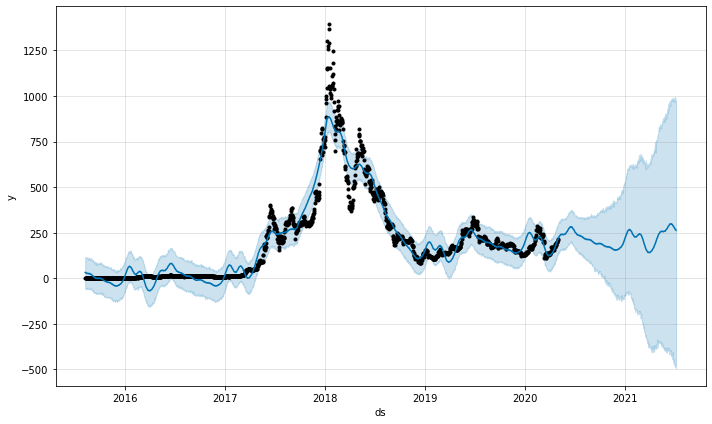

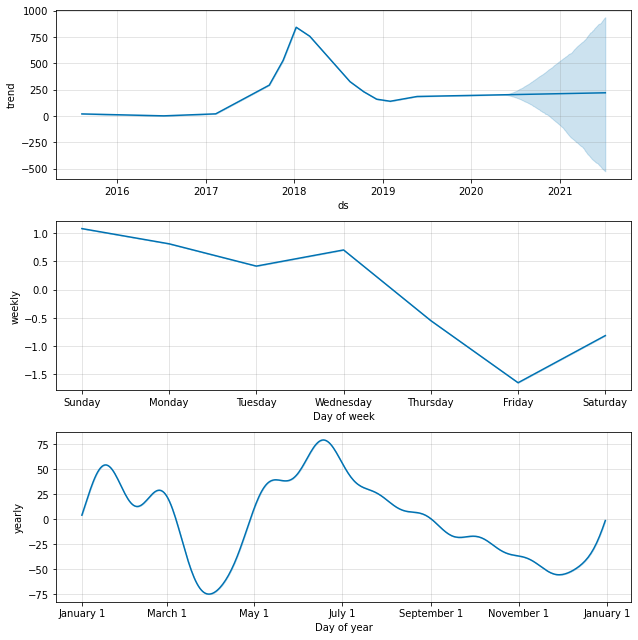

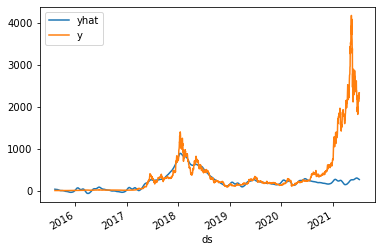

In [6]:
eth_forecast, eth_predictions, eth_components, eth_predict_accuracy = preprocess_and_model(eth)
eth_forecast

## Cardano (ADA)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2017-10-02 23:59:59,-0.069899,-0.151326,0.004487
1,2017-10-03 23:59:59,-0.064461,-0.146007,0.009984
2,2017-10-04 23:59:59,-0.057529,-0.139481,0.021157
3,2017-10-05 23:59:59,-0.052167,-0.131028,0.026772
4,2017-10-06 23:59:59,-0.045652,-0.123396,0.031049
...,...,...,...,...
1368,2021-07-01 23:59:59,0.182399,-0.111418,0.483669
1369,2021-07-02 23:59:59,0.183793,-0.127097,0.504916
1370,2021-07-03 23:59:59,0.188526,-0.099604,0.508161
1371,2021-07-04 23:59:59,0.189475,-0.118910,0.492931


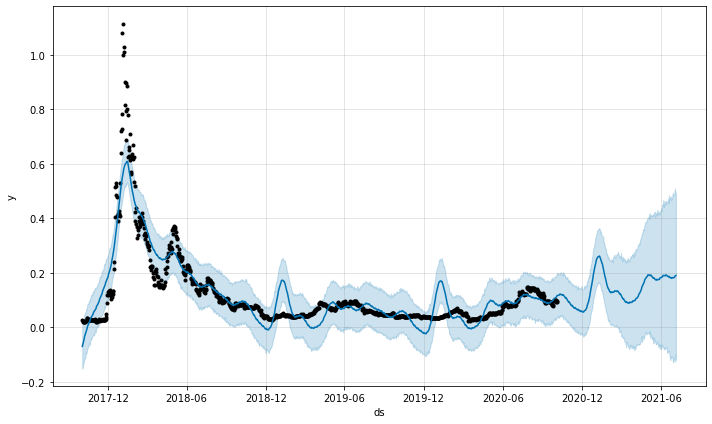

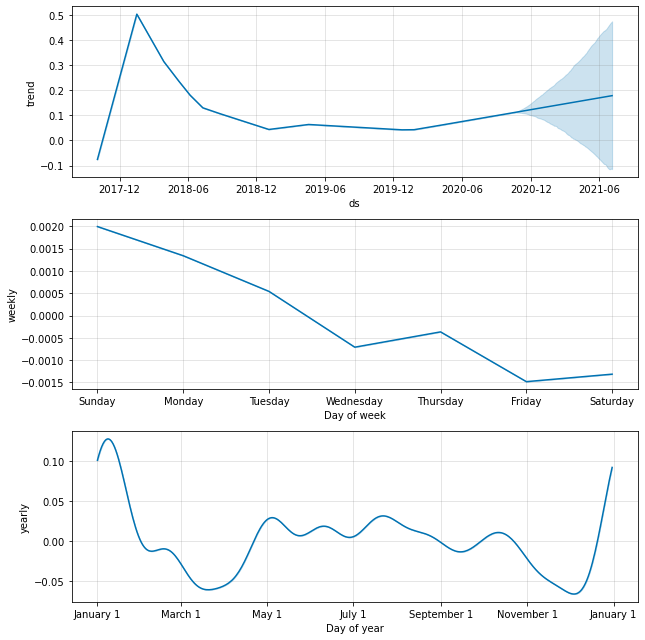

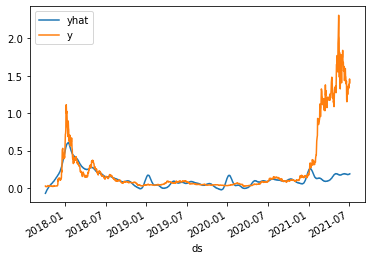

In [7]:
ada_forecast, ada_predictions, ada_components, ada_predict_accuracy = preprocess_and_model(ada)
ada_forecast